In [8]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#load mnist dataset
(X_train_loaded, y_train_loaded), (X_test_loaded, y_test_loaded) = mnist.load_data()


# Preparing the Dataset

In [9]:
X_train = X_train_loaded.reshape(X_train_loaded.shape[0], 28, 28, 1)
X_test = X_test_loaded.reshape(X_test_loaded.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

number_of_classes = 10
y_train = keras.utils.to_categorical(y_train_loaded, num_classes=number_of_classes)
y_test = keras.utils.to_categorical(y_test_loaded, num_classes=number_of_classes)

#decreasing dataset to train faster for algorithm testing
X_train, _,_,_,_,_ = np.split(X_train,6)
y_train, _,_,_,_,_ = np.split(y_train,6)
input_shape = X_train[1].shape
print(input_shape)
print(X_train.shape)

(28, 28, 1)
(10000, 28, 28, 1)


In [13]:
class Network:
    def __init__(self):
        model = Sequential()
        model.add(Conv2D(24, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(100,activation = "relu"))
        model.add(Dense(10, activation="softmax"))
        model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
        self.model = model
        self.acc_history = []

    def return_acc_history(self):
        return self.acc_history

    def get_layer_weight(self,i):
        return self.model.layers[i].get_weights()

    def set_layer_weight(self,i,weight):
        self.model.layers[i].set_weights(weight)

    def train(self):
        self.model.fit(X_train,y_train, batch_size = 32, epochs = 1, verbose = 1,shuffle = True) #, validation_data =(X_test, y_test)

    def test(self):
        loss, acc = self.model.evaluate(X_test,y_test)
        self.acc_history.append(acc)
        return acc

    def load_layer_weights(self,weights):
        self.model.set_weights(weights)

    def give_weights(self):
        return self.model.get_weights()
    def weight_len(self):
        i = 0
        for j in self.model.layers:
            i+=1
        return i
    def architecture(self):
        self.model.summary()

In [20]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, generations = 50):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = None
        self.children_population_weights = []
        self.acces = []
        self.norm_acces = []
        self.best_acc = 0
        self.best_gen = 0

    def create_population(self):
        self.population = [Network() for i in range(self.population_size)]

    def train_generation(self):
        for member in self.population:
                member.train()

    def predict(self):
        for member in self.population:
                acc = member.test()
                self.acc.append(acc)
                #logging.info("Losses: {}".format(loss))

    def normalize(self):
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc]
        print("\nNormalization sum: ",sum(self.norm_acc))
        #assert sum(self.norm_acc) == 1

    def show_weights(self):
        for i in parent_weights:
            print(i)
    def clear_losses(self):
        self.norm_acc = []
        self.acc = []

    def mutate(self):
        for member in self.population:
            for i in range(member.weight_len()):
                if np.random.random() < self.mutation_rate:
                    print("\nMutation!")
                    old_weight = member.get_layer_weight(i)
                    new_weight = [np.random.uniform(low=-1, high=1, size=old_weight[i].shape) for i in range(len(old_weight))]
                    member.set_layer_weight(i, new_weight)

    def reproduction(self):

        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):

            if sum(self.norm_acc) != 0:
                parent1 = np.random.choice(population_idx, p = self.norm_acc)
                parent2 = np.random.choice(population_idx, p = self.norm_acc)
            else:

                parent1 = np.random.choice(population_idx)
                parent2 = np.random.choice(population_idx)


            parent1_weights = self.population[parent1].give_weights()
            parent2_weights = self.population[parent2].give_weights()


            mid_point = np.random.choice([i for i in range(len(parent1_weights))])

            self.children_population_weights.append(parent1_weights[:mid_point] + parent2_weights[mid_point:])

        for i in range(len(self.population)):
            for j in range(len(self.children_population_weights)):
                self.population[i].load_layer_weights(self.children_population_weights[j])



    def run_evolution(self):
        for episode in range(self.generations):
            self.clear_losses()
            self.train_generation()
            self.predict()

            # Check for best accuracy
            max_acc = max(self.acc)
            if max_acc > self.best_acc:
                self.best_acc = max_acc
                self.best_gen = episode + 1

            if episode != self.generations - 1:
                self.normalize()
                self.reproduction()
                self.mutate()
            else:
                pass

        print("Best result of generations is {}th generation with accuracy {:.2f}%".format(self.best_gen, self.best_acc*100))

        for a in range(self.generations):
            for member in self.population:
                plt.plot(member.acc_history)
        plt.xlabel("Generations")
        plt.ylabel("Accuracy")
        plt.show()


313/313 [==============================] - 1s 2ms/step - loss: 0.1684 - accuracy: 0.9499

Normalization sum:  1.0

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!
313/313 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9622

Normalization sum:  1.0

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!
313/313 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9644

Normalization sum:  1.0

Mutation!

Mutation!

Mutation!
313/313 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9679

Normalization sum:  1.0

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!

Mutation!
313/313 [==============================] - 1s 3ms/step - loss: 0.1942 - accuracy: 0.9479

Normalization sum:  1.0

Mutation!

Mutation!

Mutation!

Mutation!
313/313 [=========================

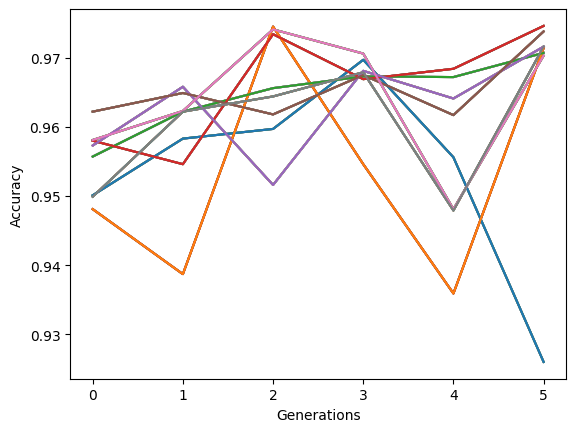

In [21]:
GA = GeneticAlgorithm(population_size = 8, mutation_rate = 0.1, generations = 6)
GA.create_population()
GA.run_evolution()